In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [5]:
df=pd.read_csv('covid.csv')

In [6]:
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,date,day,month,year,cases,deaths,countries,geoId,countryterritoryCode,popData2018
0,4/6/2020,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0
1,4/5/2020,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0
2,4/4/2020,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0
3,4/3/2020,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0
4,4/2/2020,2,4,2020,26,0,Afghanistan,AF,AFG,37172386.0


In [7]:
df.shape

(9107, 10)

In [8]:
df.dtypes

date                     object
day                       int64
month                     int64
year                      int64
cases                     int64
deaths                    int64
countries                object
geoId                    object
countryterritoryCode     object
popData2018             float64
dtype: object

In [9]:
df['date']=pd.to_datetime(df['date'])
df.dtypes

date                    datetime64[ns]
day                              int64
month                            int64
year                             int64
cases                            int64
deaths                           int64
countries                       object
geoId                           object
countryterritoryCode            object
popData2018                    float64
dtype: object

In [10]:
df['qtr']=df['date'].dt.quarter
df.head()

,date,day,month,year,cases,deaths,countries,geoId,countryterritoryCode,popData2018,qtr
0,2020-04-06,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0,2
1,2020-04-05,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0,2
2,2020-04-04,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0,2
3,2020-04-03,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0,2
4,2020-04-02,2,4,2020,26,0,Afghanistan,AF,AFG,37172386.0,2


In [11]:
# KDE plot(kernel density estimate)

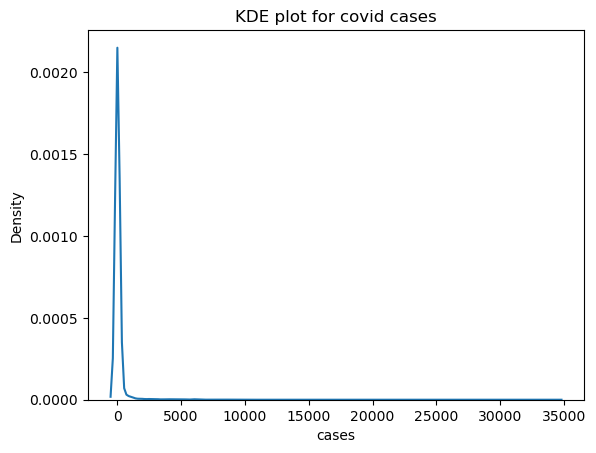

In [12]:
sns.kdeplot(data=df,x='cases')
plt.title('KDE plot for covid cases')
plt.show()

In [56]:
df_mar_apr=df[df['month'].isin([3,4])]
df_mar_apr['month'].value_counts()

3    3815
4    1205
Name: month, dtype: int64

In [57]:
df_mar_apr.shape

(5020, 11)

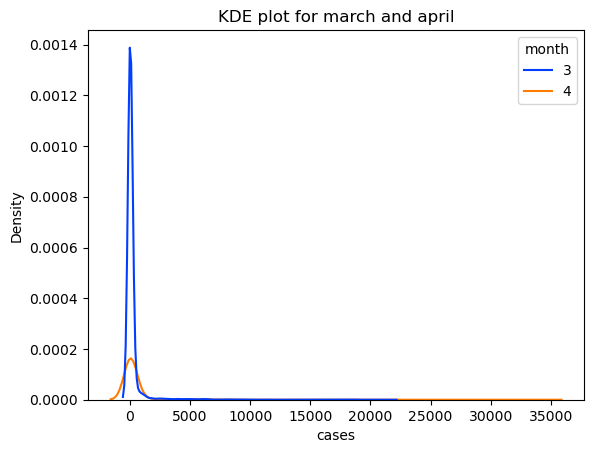

In [58]:
sns.kdeplot(data=df_mar_apr,x='cases',hue='month',palette='bright')
plt.title('KDE plot for march and april')
plt.show()

In [59]:
# hisplot

In [60]:
# plot hisplot for cases for the countries india,belgium and russia for the months includind mar or apr

In [61]:
df_3c=df[df['countries'].isin(['India','Belgium','Russia'])]
df_3c.shape

(288, 11)

In [62]:
df_3c['countries'].value_counts()

Belgium    98
India      97
Russia     93
Name: countries, dtype: int64

In [63]:
df_3c_mar_apr=df_3c[df_3c['month'].isin([3,4])]
df_3c_mar_apr.shape

(105, 11)

In [64]:
df_3c_mar_apr['month'].value_counts()

3    87
4    18
Name: month, dtype: int64

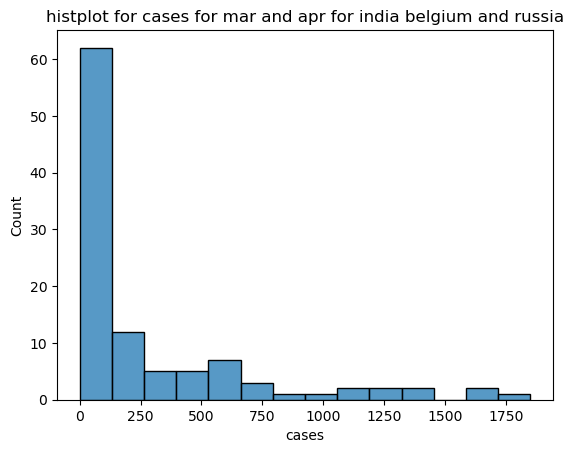

In [65]:
sns.histplot(data=df_3c_mar_apr,x='cases')
plt.title('histplot for cases for mar and apr for india belgium and russia')
plt.show()

In [66]:
# plot hisplot for cases for the countries india,belgium and russia for the months includind mar or apr
# where month is set as hue parameter

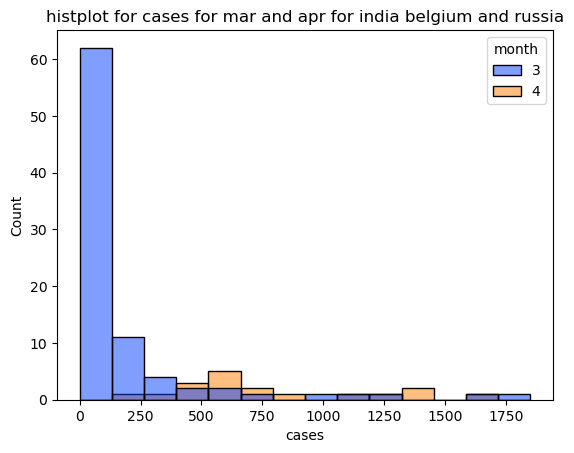

In [67]:
sns.histplot(data=df_3c_mar_apr,x='cases',hue='month',palette='bright')
plt.title('histplot for cases for mar and apr for india belgium and russia')
plt.show()

In [68]:
# plot hisplot for cases for the countries india,belgium and russia for the months mar or apr

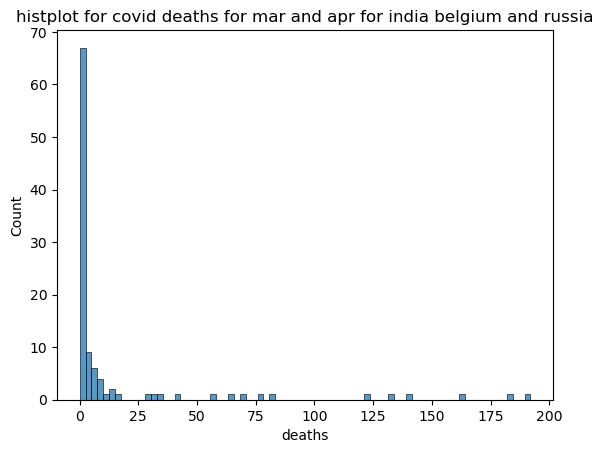

In [69]:
sns.histplot(data=df_3c_mar_apr,x='deaths')
plt.title('histplot for covid deaths for mar and apr for india belgium and russia')
plt.show()

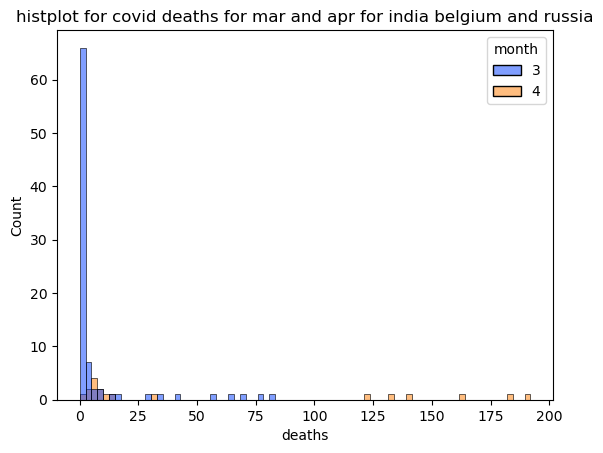

In [70]:
sns.histplot(data=df_3c_mar_apr,x='deaths',hue='month',palette='bright')
plt.title('histplot for covid deaths for mar and apr for india belgium and russia')
plt.show()

In [71]:
# plot hisplot for cases for the countries india,belgium and russia for the months 
#mar or apr where month is set as hue parameter

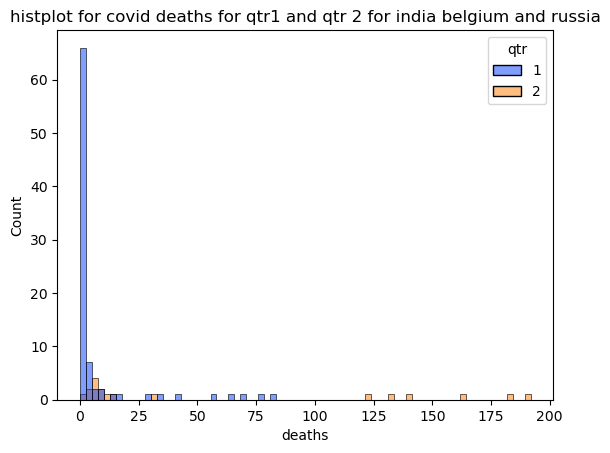

In [72]:
sns.histplot(data=df_3c_mar_apr,x='deaths',hue='qtr',palette='bright')
plt.title('histplot for covid deaths for qtr1 and qtr 2 for india belgium and russia')
plt.show()

In [73]:
# Heatmap

In [74]:
# plot the correlation matrix on heatmap excluding the column year

In [75]:
df.columns

Index(['date', 'day', 'month', 'year', 'cases', 'deaths', 'countries', 'geoId',
       'countryterritoryCode', 'popData2018', 'qtr'],
      dtype='object')

In [76]:
df1=df.iloc[:,[1,2,4,5,10]]
df1.columns

Index(['day', 'month', 'cases', 'deaths', 'qtr'], dtype='object')

In [77]:
corr=df1.corr()
corr

,day,month,cases,deaths,qtr
day,1.000000,-0.040470,-0.002845,-0.016463,-0.330084
month,-0.040470,1.000000,0.077225,0.081421,0.755988
cases,-0.002845,0.077225,1.000000,0.755922,0.067657
deaths,-0.016463,0.081421,0.755922,1.000000,0.085825
qtr,-0.330084,0.755988,0.067657,0.085825,1.000000


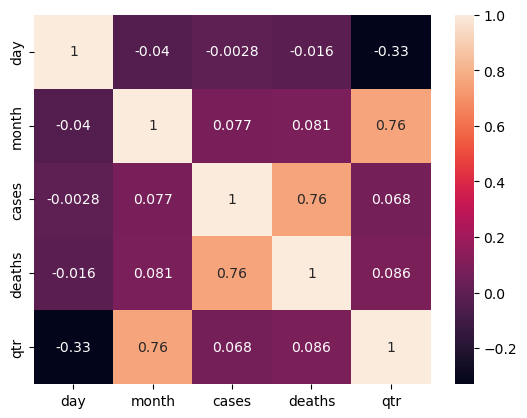

In [78]:
sns.heatmap(data=corr,annot=True)
plt.show()

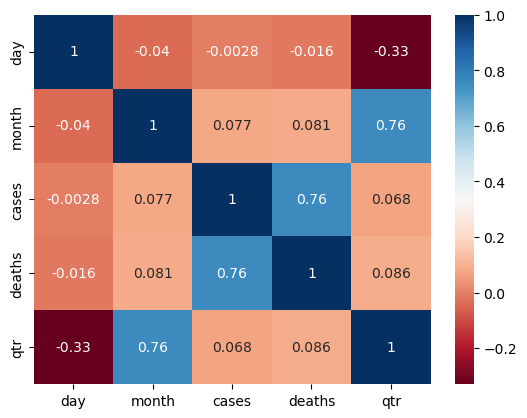

In [79]:
sns.heatmap(data=corr,annot=True,cmap='RdBu')
plt.show()

In [80]:
corr_cd=df.iloc[:,[4,5]].corr()
corr_cd

,cases,deaths
cases,1.000000,0.755922
deaths,0.755922,1.000000


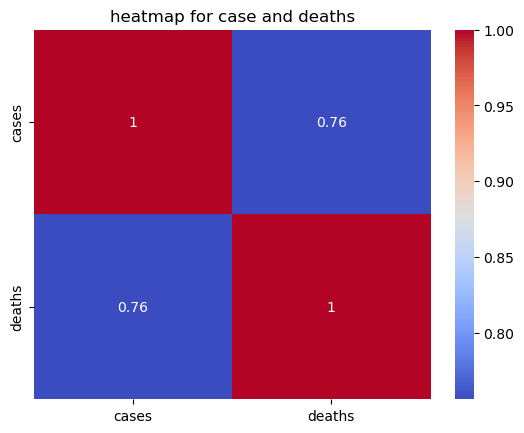

In [81]:
sns.heatmap(data=corr_cd,annot=True,cmap='coolwarm')
plt.title('heatmap for case and deaths')
plt.show()

In [82]:
# joint plot

In [83]:
# plot jointplot for cases and deaths  for the countries india,belgium and russia for the months 
# mar or apr

In [84]:
df_3c_mar_apr['countries'].value_counts()

Belgium    37
India      36
Russia     32
Name: countries, dtype: int64

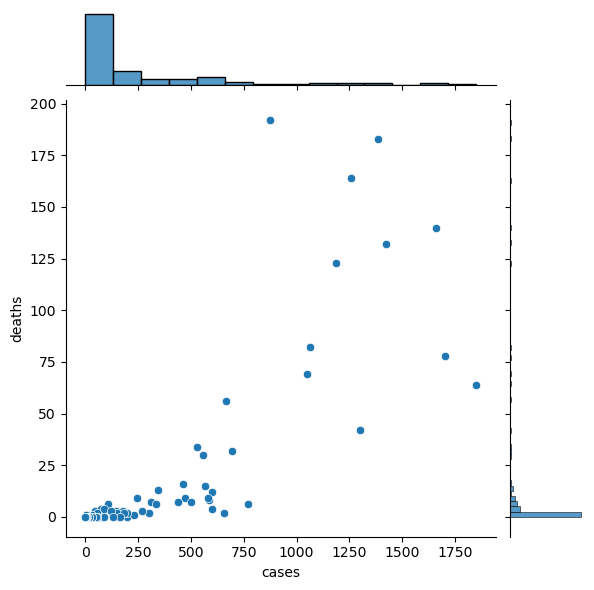

In [86]:
sns.jointplot(data=df_3c_mar_apr,x='cases',y='deaths')
plt.show()

In [ ]:
# plot jointplot for cases and deaths  for the countries india,belgium and russia for the months 
# mar or apr where month is set as hue parameter

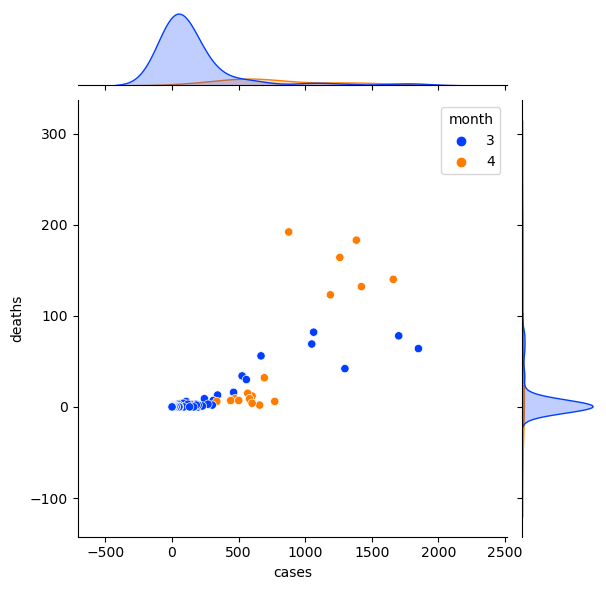

In [87]:
sns.jointplot(data=df_3c_mar_apr,x='cases',y='deaths',hue='month',palette='bright')
plt.show()

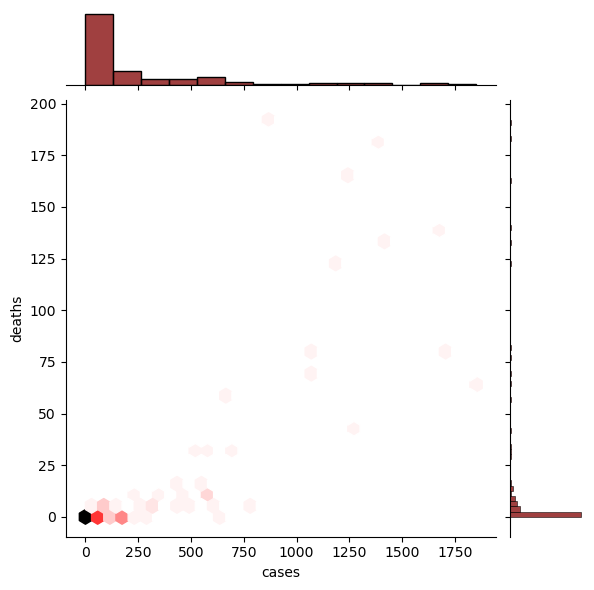

In [91]:
sns.jointplot(data=df_3c_mar_apr,x='cases',y='deaths',palette='bright',kind='hex',color='maroon')
plt.show()